In [11]:
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble

# import basic plot tools
from qiskit.visualization import plot_histogram
from numpy import random


# For ZZ Pump

In [12]:
def zz_pump(q, c, p, system, ancilla, ini):
    z = QuantumCircuit(q, c)
    if ini == "01":
        z.x(q[system[0]])
    elif ini == "10":
        z.x(q[system[1]])
    elif ini == "11":
        z.x(q[system[0]])
        z.x(q[system[1]])
    
    z.cx(q[system[0]], q[system[1]])
    z.x(q[ancilla])
    z.cx(q[system[1]], q[ancilla])
    
    theta = 2 * np.arcsin(np.sqrt(p))
    
    z.cu3(theta, 0.0, 0.0, q[ancilla], q[system[1]])
    
    z.cx(q[system[1]], q[ancilla])
    # z.cx(q[system[0]], q[system[1]])
    z.h(q[system[0]])
    z.measure(q[system[0]], c[0])
    z.measure(q[system[1]], c[1])
    return z  


C:\Users\barbi\AppData\Local\Temp\ipykernel_4416\19020040.py:17: DeprecationWarning: The QuantumCircuit.cu3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cu method instead, where cu3(ϴ,φ,λ) = cu(ϴ,φ,λ,0).
  z.cu3(theta, 0.0, 0.0, q[ancilla], q[system[1]])


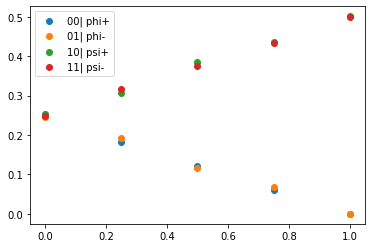

In [13]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
p = np.linspace(0,1.0,5)
dict = {}
a = [[0] * 4 for i in range(len(p))]
b = [[0] * len(p) for i in range(4)]


labels = ['00', '01', '10', '11']
for inis in labels:
    k=0
    for i in p:
        q = QuantumRegister(5, name='q')
        c = ClassicalRegister(2, name='c')
        qobj = assemble(zz_pump(q, c,i, [2,1], 0, inis))
        results = aer_sim.run(qobj).result()
        answer = {'00':0,'01':0,'10':0,'11':0}
        labels = list(answer.keys())
        for key,value in results.get_counts().items():
            answer[key] = value
        for j in range(4):
            a[k][j] = answer[labels[j]]/1024
        k=k+1
    # Plotting
    for l in range(4):
        for m in range(5):
            b[l][m] = b[l][m]+a[m][l]
    # print(b)

plt.scatter(p,(np.asarray(b[0]))/4, label="00| phi+")
plt.scatter(p,(np.asarray(b[1]))/4,  label="01| phi-")
plt.scatter(p,(np.asarray(b[2]))/4,  label="10| psi+")
plt.scatter(p,(np.asarray(b[3]))/4,  label="11| psi-")
plt.legend()

# For XX Pump

In [18]:
def xx_pump(q, c, p, system, ancilla, ini):
    xx = QuantumCircuit(q, c)
    if ini == "01":
        xx.x(q[system[0]])
    elif ini == "10":
        xx.x(q[system[1]])
    elif ini == "11":
        xx.x(q[system[0]])
        xx.x(q[system[1]])
    
    xx.cx(q[system[0]], q[system[1]])
    xx.h(q[system[0]])
    xx.x(q[ancilla])
    xx.cx(q[system[0]], q[ancilla])
    
    theta = 2 * np.arcsin(np.sqrt(p))
    xx.cu3(theta, 0.0, 0.0, q[ancilla], q[system[0]])
    
    xx.cx(q[system[0]], q[ancilla])
    
    xx.measure(q[system[0]], c[0])
    xx.measure(q[system[1]], c[1])
    
    return xx

C:\Users\barbi\AppData\Local\Temp\ipykernel_4416\1171266329.py:17: DeprecationWarning: The QuantumCircuit.cu3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cu method instead, where cu3(ϴ,φ,λ) = cu(ϴ,φ,λ,0).
  xx.cu3(theta, 0.0, 0.0, q[ancilla], q[system[0]])


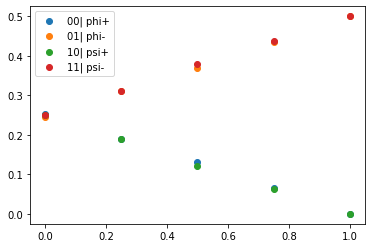

In [19]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
p = np.linspace(0,1.0,5)
dict = {}
a = [[0] * 4 for i in range(len(p))]
b = [[0] * len(p) for i in range(4)]


labels = ['00', '01', '10', '11']
for inis in labels:
    k=0
    for i in p:
        q = QuantumRegister(5, name='q')
        c = ClassicalRegister(2, name='c')
        qobj = assemble(xx_pump(q, c,i, [2,1], 0, inis))
        results = aer_sim.run(qobj).result()
        answer = {'00':0,'01':0,'10':0,'11':0}
        labels = list(answer.keys())
        for key,value in results.get_counts().items():
            answer[key] = value
        for j in range(4):
            a[k][j] = answer[labels[j]]/1024
        k=k+1
    # Plotting
    for l in range(4):
        for m in range(5):
            b[l][m] = b[l][m]+a[m][l]
    # print(b)

plt.scatter(p,(np.asarray(b[0]))/4, label="00| phi+")
plt.scatter(p,(np.asarray(b[1]))/4,  label="01| phi-")
plt.scatter(p,(np.asarray(b[2]))/4,  label="10| psi+")
plt.scatter(p,(np.asarray(b[3]))/4,  label="11| psi-")
plt.legend()

# For ZZ and XX Pump

In [22]:
def zz_xx_pump(q, c, p, system, ancillae, ini):
    zx = QuantumCircuit(q, c)
    if ini == "01":
        zx.x(q[system[0]])
    elif ini == "10":
        zx.x(q[system[1]])
    elif ini == "11":
        zx.x(q[system[0]])
        zx.x(q[system[1]])
        
    zx.cx(q[system[0]], q[system[1]])
    zx.x(q[ancillae[0]])
    zx.cx(q[system[1]], q[ancillae[0]])
    
    theta = 2 * np.arcsin(np.sqrt(p))
    zx.cu3(theta, 0.0, 0.0, q[ancillae[0]], q[system[1]])
    
    zx.cx(q[system[1]], q[ancillae[0]])
    
    zx.h(q[system[0]])
    zx.x(q[ancillae[1]])
    zx.cx(q[system[0]], q[ancillae[1]])
    
    zx.cu3(theta, 0.0, 0.0, q[ancillae[1]], q[system[0]])
    
    zx.cx(q[system[0]], q[ancillae[1]])
    
    zx.measure(q[system[0]], c[0])
    zx.measure(q[system[1]], c[1])
    
    return zx

C:\Users\barbi\AppData\Local\Temp\ipykernel_4416\1980452409.py:16: DeprecationWarning: The QuantumCircuit.cu3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cu method instead, where cu3(ϴ,φ,λ) = cu(ϴ,φ,λ,0).
  zx.cu3(theta, 0.0, 0.0, q[ancillae[0]], q[system[1]])
C:\Users\barbi\AppData\Local\Temp\ipykernel_4416\1980452409.py:24: DeprecationWarning: The QuantumCircuit.cu3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cu method instead, where cu3(ϴ,φ,λ) = cu(ϴ,φ,λ,0).
  zx.cu3(theta, 0.0, 0.0, q[ancillae[1]], q[system[0]])


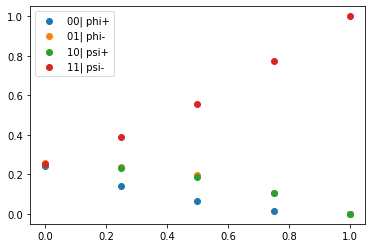

In [25]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
p = np.linspace(0,1.0,5)
dict = {}
a = [[0] * 4 for i in range(len(p))]
b = [[0] * len(p) for i in range(4)]


labels = ['00', '01', '10', '11']
for inis in labels:
    k=0
    for i in p:
        q = QuantumRegister(5, name='q')
        c = ClassicalRegister(2, name='c')
        qobj = assemble(zz_xx_pump(q, c,i, [2,1], [0,4], inis))
        results = aer_sim.run(qobj).result()
        answer = {'00':0,'01':0,'10':0,'11':0}
        labels = list(answer.keys())
        for key,value in results.get_counts().items():
            answer[key] = value
        for j in range(4):
            a[k][j] = answer[labels[j]]/1024
        k=k+1
    # Plotting
    for l in range(4):
        for m in range(5):
            b[l][m] = b[l][m]+a[m][l]
    # print(b)

plt.scatter(p,(np.asarray(b[0]))/4, label="00| phi+")
plt.scatter(p,(np.asarray(b[1]))/4,  label="01| phi-")
plt.scatter(p,(np.asarray(b[2]))/4,  label="10| psi+")
plt.scatter(p,(np.asarray(b[3]))/4,  label="11| psi-")
plt.legend()